In [1]:
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.timeseries import LombScargle

/home/gauravbhoir147/.local/lib/python3.12/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 12 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/tmp/ipykernel_4740/3529030976.py:12: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lcf.remove_nans().PDCSAP_FLUX  # Stitch all light curves, remove NaNs, and select PDCSAP_FLUX


<Figure size 640x480 with 0 Axes>

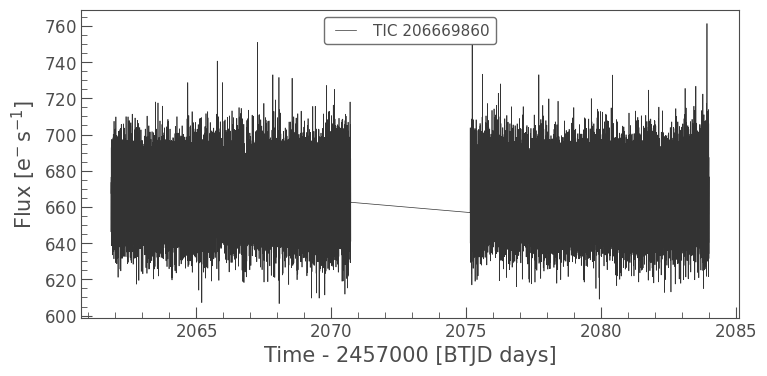

0.00023149765635465064 d


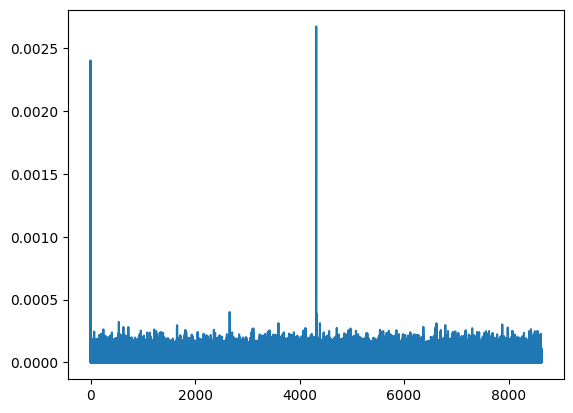

/home/gauravbhoir147/.local/lib/python3.12/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 160 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/tmp/ipykernel_4740/3529030976.py:12: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lcf.remove_nans().PDCSAP_FLUX  # Stitch all light curves, remove NaNs, and select PDCSAP_FLUX


<Figure size 640x480 with 0 Axes>

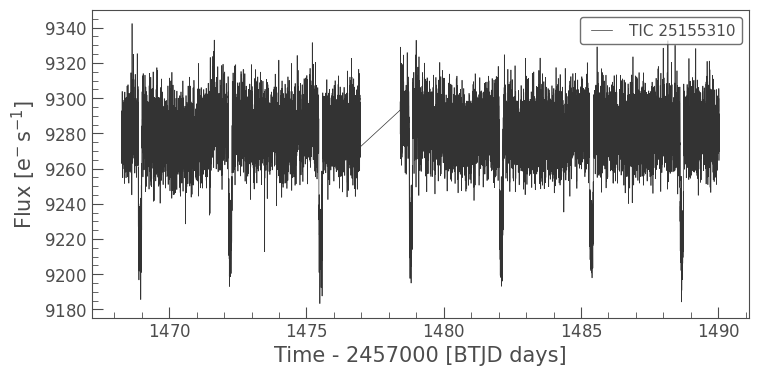

0.0006939930735720425 d


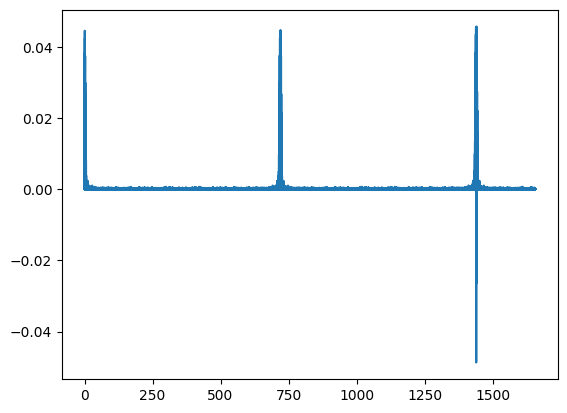

In [2]:
import lightkurve as lk
import matplotlib.pyplot as plt

# List of target TIC IDs
targets = ["TIC 206669860" , "TIC 25155310"]  #, "TIC 19825308", "TIC 16769516", "TIC 14784919"]

def getlcurve(Name):
    try:
        # Search and download light curve
        search_result = lk.search_lightcurve(Name, mission="TESS")
        lcf = search_result.download()  # Download all available light curves
        lc = lcf.remove_nans().PDCSAP_FLUX  # Stitch all light curves, remove NaNs, and select PDCSAP_FLUX
        
        # Plot the light curve
        lc.plot(title=Name)
        plt.show()
        t = lc.time
        f = lc.flux
        frequency, power = LombScargle(t, f).autopower()
        best_frequency = frequency[np.argmax(power)]
        period = 1 / best_frequency
        print(period)
        plt.plot(frequency,power)
        plt.show()
    except Exception as e:
        print(f"Could not get data for {Name}: {e}")

# Create a figure for each target
for i in targets:
    plt.figure()
    getlcurve(i)

# Show the plots
plt.show()


/home/gauravbhoir147/.local/lib/python3.12/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 160 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


14436 14436


/tmp/ipykernel_4740/2604223973.py:4: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lcf.remove_nans().PDCSAP_FLUX  # Clean and get PDCSAP_FLUX


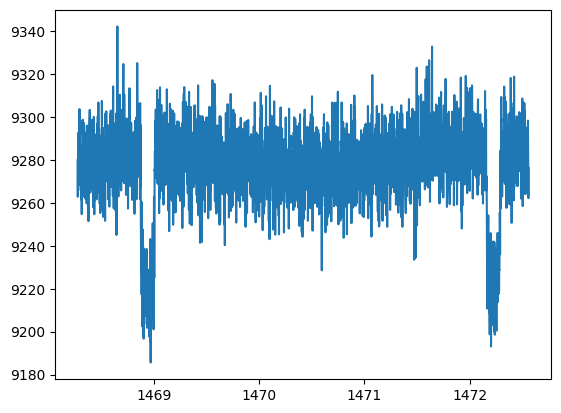

In [12]:
# Search and download light curve
search_result = lk.search_lightcurve("TIC 25155310", mission="TESS")
lcf = search_result.download()
lc = lcf.remove_nans().PDCSAP_FLUX  # Clean and get PDCSAP_FLUX

# Extract time and flux data
t = lc.time.value  # Get the time values (in days)
f = lc.flux.value  # Get the flux values

# Print the length of time and flux arrays
print(len(t), len(f))

# Create a pandas DataFrame
df = pd.DataFrame({
    "Time": t,
    "Flux": f
})
frame = df.iloc[:3000]
Time = frame["Time"].values
Flux = frame["Flux"].values


# Display the first few rows of the DataFrame
plt.plot(Time,Flux)
plt.show()

/home/gauravbhoir147/.local/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/gauravbhoir147/.local/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


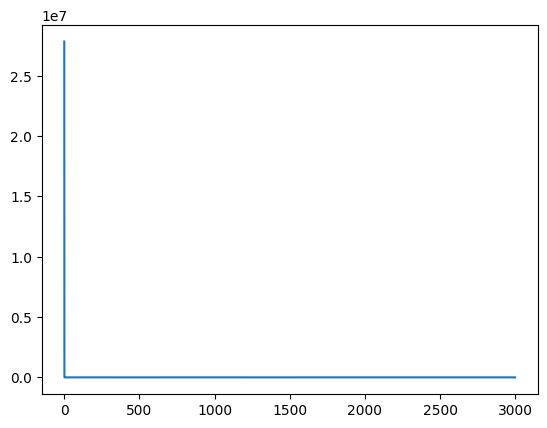